# TP 1 : Pablo Pevsner et Paul Fayard

## Exercice 1 :  Synthetic data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

We create two clusters of points, which have the label 0 or 1.

Text(0.5,1,'Two blobs')

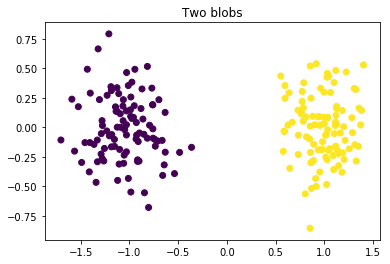

In [2]:
X, y = make_blobs(n_samples=200, centers=[[-1,0],[1,0]], n_features=2,cluster_std=0.5**2)
plt.scatter(X[:,0],X[:,1], c=y)
plt.title("Two blobs")

In [3]:
#Function that add an intercept for each x in X 

def add_bias(X):
  newX=[]
  for x in X:
    newX.append(np.array([x[0],x[1],1]))
  newX=np.array(newX)
  return newX

In [4]:
X=add_bias(X)

In [5]:
#Functions that realize the perceptron algorithm

def prediction(X,w):
  if np.vdot(X,w)>0:
    return 1
  else : 
    return 0 

def perceptron(X,y,nb_steps):
  w=np.zeros(len(X[0]))
  for k in range(nb_steps):
    for i in range(len(X)):
      if prediction(X[i],w)!=y[i]:   #if the prediction is wrong, we change w 
        if prediction(X[i],w)==1:
          w=w-X[i]
        else:
          w=w+X[i]
  return w

In [6]:
w=perceptron(X,y,200)

Text(0.5,1,'Two blobs')

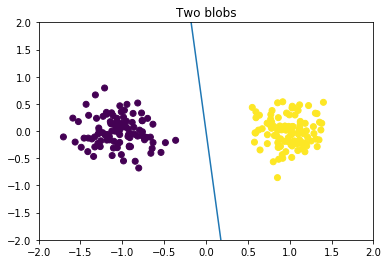

In [7]:
#The result when std = 0.5

x_boundary=np.arange(-2,12,0.01)
y_boudary=(float(-w[0])/w[1])*x_boundary-w[2]/w[1]


plt.plot(x_boundary,y_boudary)
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.title("Two blobs")

In [8]:
#This function returns, for the w obtained, the average error

def average_error(X,y,w):
    n=len(X)
    s=0
    for i in range(n):
        if prediction(X[i],w)!=y[i]:
            s+=1
    return float(s)/n

average_error(X,y,w)

0.0

For std = 0.5 , X is often separable so it returns 0.

### Question 1 : Perceptron for different standard deviations 

In [9]:
stds=np.array([0.05, 0.25, 0.50, 0.75])
erreurs=[]


def error(std):
    erreur=[]
    for k in range(50):
        X, y = make_blobs(n_samples=200, centers=[[-1,0],[1,0]], n_features=2,cluster_std=std)
        w=perceptron(X,y,200)
        erreur.append(average_error(X,y,w))
        #print(erreur)
    erreur=np.array(erreur)
    return ([erreur.mean(),erreur.std()])
    

erreurs=[]
for std in stds:
    erreurs.append(error(std))

Text(0,0.5,'Average error')

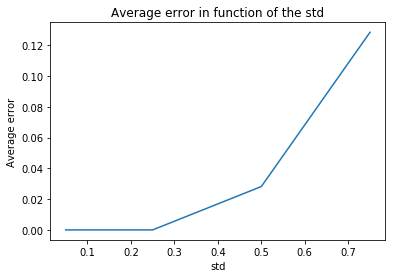

In [11]:
ordonnee1=[]
for i in range(4):
    ordonnee1.append(erreurs[i][0])
    
plt.plot(stds,ordonnee1)
plt.title("Average error in function of the std")
plt.xlabel("std")
plt.ylabel("Average error")

Text(0,0.5,'Std of the average error')

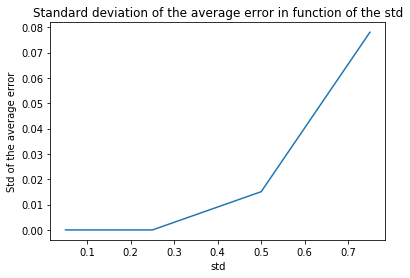

In [13]:
ordonnee2=[]
for i in range(4):
    ordonnee2.append(erreurs[i][1])
    
plt.plot(stds,ordonnee2)
plt.title("Standard deviation of the average error in function of the std")
plt.xlabel("std")
plt.ylabel("Std of the average error")

### Question 2 : Perceptron with some random data

In [18]:
import random as rd

In [19]:
std=0.15
X, y = make_blobs(n_samples=200, centers=[[-1,0],[1,0]], n_features=2,cluster_std=std)

probas=[0,0.05,0.10,0.2]
n=200

erreurs=[]

def error(p):
  erreur=[]
  for k in range(50):
    X, y = make_blobs(n_samples=200, centers=[[-1,0],[1,0]], n_features=2,cluster_std=std)
    for i in range(n):
      a=rd.random()
      if a<p:
        y[i]=1-y[i]
    w=perceptron(X,y,200)
    erreur.append(average_error(X,y,w))
  erreur=np.array(erreur)
  return([erreur.mean(),erreur.std()])


for p in probas:
    erreurs.append(error(p))
    
print(erreurs)

[[0.0, 0.0], [0.0736, 0.09964456834168131], [0.15200000000000002, 0.1783367600916872], [0.30269999999999997, 0.21649297910093987]]


Text(0,0.5,'Average error')

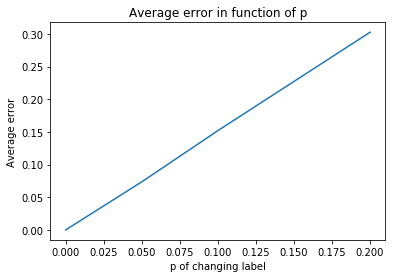

In [20]:
ordonnee1=[]
for i in range(4):
    ordonnee1.append(erreurs[i][0])
    
plt.plot(probas,ordonnee1)
plt.title("Average error in function of p")
plt.xlabel("p of changing label")
plt.ylabel("Average error")

Text(0,0.5,'Std of the average error')

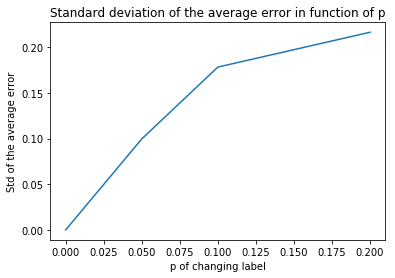

In [21]:
ordonnee2=[]
for i in range(4):
    ordonnee2.append(erreurs[i][1])
    
plt.plot(probas,ordonnee2)
plt.title("Standard deviation of the average error in function of p")
plt.xlabel("p of changing label")
plt.ylabel("Std of the average error")

## Exercice 2 

In [16]:
import tiilab

imz2mat : version janvier 2018.  Fichier à ouvrir : data/landsattarasconC4.ima
Dans ximaread : image monocanal
Dans ximaread : lecture du canal 0/1
image en .ima
image en .ima
('image en .ima ', 512, ' ', 512, '  canaux:', 1, ' verif : ', 0)
('lecture de ', 'data/landsattarasconC4.ima', ' en quelconque', 512, 512, 1, ' offset ', 0, '>B', 1, ' complex', 0, 'blocksize', 262144)
Données réelles. Nouvelle version de imz2mat  >B
Affichage d'une image reelle
Image seuillee : valmoy (86.344) + 3.000 sigma  (0.,152.41)
plt.show dans visusar : image 512 x 512


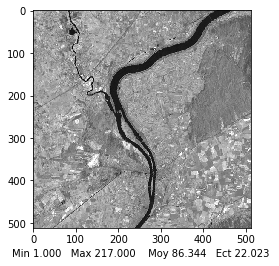

array([[ 74.,  82., 107., ...,  79.,  74.,  94.],
       [ 96., 111., 116., ...,  84.,  77.,  99.],
       [ 81., 109., 117., ...,  90.,  86.,  91.],
       ...,
       [ 78.,  82.,  80., ...,  61.,  69.,  65.],
       [ 81.,  76.,  78., ...,  57.,  58.,  65.],
       [ 83.,  81.,  84., ...,  57.,  54.,  65.]])

In [17]:
img=tiilab.imz2mat("data/landsattarasconC4.ima")
tiilab.visusar(img[0])

### Question 1 : Labeling data

If the pixel is below 20, the lable is 1, else it's 2.

In [18]:
def create_labels(img):
    image=img[0]
    n=len(image[0])
    m=len(image[1])
    labels=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            if image[i][j]<30:
                labels[i][j]=1
            else:
                labels[i][j]=2
    return labels

In [19]:
y=create_labels(img)
print(y)

[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


### Question 2 : Implementing the perceptron’s error-correction rule

In [20]:
def prediction_img(X,w):
    if np.vdot(X,w)>0:
        return 1
    else : 
        return 2  

In [25]:
def error_correction(img,y,eta,w):
    image=img[0]
    n=len(image[0])
    m=len(image[1])
    former_w=w
    epoch=0
    for i in range(n):
        for j in range(m):
            if prediction_img(np.array([image[i][j],1]),w)!=y[i][j]:   #if the prediction is wrong, we change w 
                if prediction_img(np.array([image[i][j],1]),w)==1:
                    w=w-np.array([image[i][j],1])
                else:
                    w=w+np.array([image[i][j],1])
    while (w[0]!=former_w[0] or w[1]!=former_w[1]):
        epoch+=1
        print("Epoch number",epoch)
        print("w=",w)
        former_w=w
        for i in range(n):
            for j in range(m):
                if prediction_img(np.array([image[i][j],1]),w)!=y[i][j]:   #if the prediction is wrong, we change w 
                    if prediction_img(np.array([image[i][j],1]),w)==1:
                        w=w-eta*np.array([image[i][j],1])
                    else:
                        w=w+eta*np.array([image[i][j],1])
            
    return w,epoch

In [26]:
image=img[0]
n=len(image[0])
m=len(image[1])
w=np.array([0,0])

error_correction(img,y,0.01,w)
    

('Epoch number', 1)
('w=', array([ -8., 234.]))


(array([ -8., 234.]), 1)